In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Práctica 4
# Nombre: Gregorio Aarón Meza Ramos


## Modelo SIR

El modelo SIR es un modelo epidemiológico relativamente simple pero capaz de capturar varias de las dinámicas de diferentes brotes epidémicos. La idea del modelo consiste en separar la población en cada tiempo $n$ en tres compartimentos:

- los susceptibles ($S_n$)
- los infectados ($I_n$)
- los removidos ($R_n$)

La población se considera de tamaño fijo, N, por lo que se debe cumplir que $S_n +I_n +R_n =N$ en todo tiempo $n$.

**Observaciones:**

-  La población que se considerará en este modelo es constante y su tamaño es igual a $N$.
- No se tomarán en cuenta las inmigraciones y emigraciones de la población, es decir, la población será considerada cerrada.
- La población esta homogéneamente mezclada. El proceso de transmisión de la enfermedad está regido por la ley de acción de masas.
- Los individuos infecciosos abandonarán su clase a una tasa constante $γ$ para pertenecer a la clase de removidos.

Teniendo esto en cuenta, se puede plantear un sistema de ecuaciones en diferencias que describe el comportamiento de cada una de estas poblaciones de la siguiente manera:

Veamos como definir el cambio en cada una de ellas. Para ello consideraremos dos parámetros:

- $α$: la tasa de contacto efectivo de la enfermedad.
- $γ$: la tasa de recuperación promedio.

De esta forma tenemos que un individuo infectado en promedio infecta $α$ individuos por unidad de tiempo. De las $N$ personas la fracción de susceptibles al tiempo n es $S_n/N$ por lo que en promedio se infectan $ \alpha \frac{S_n}{N}$. Por otro lado, al tiempo $n$ hay $I_n$ infectados entonces en promedio, al tiempo $n$, tenemos $αS_n I_n$ Nnuevos infectados. Finalmente, tenemos que la proporción de los infectados que se recuperan (o mueren) es $γI_n$. De esta forma tenemos que:

- $ΔS_n = −α \frac{S_n I_n}{N} \quad\qquad \,\,\,$ donde $ \quad \Delta S_n=S_{n+1}-S_{n}$.
- $ΔI_n = α \frac{S_n I_n}{N} −γI_n \quad\quad$ donde $\quad ΔI_n =I_{n+1} −I_n$
- $ΔR_n = γI_n\qquad\quad\quad\quad$donde $\quad ΔR_n =R_{n+1} −R_n$.

Y así nuestro modelo queda de la siguiente manera
\begin{equation}
\begin{matrix} S_{n+1} &=& S_{n} - \frac{ \alpha S_nI_n}{N} \\ I_{n+1} &=& I_{n} + \frac{ \alpha S_nI_n}{N} - \gamma I_n\\ R_{n+1} &=& R_{n} + \gamma I_n. \end{matrix}  \label{eq:SIR2}\tag{2.0}
\end{equation}

De esta forma podemos definir la siguiente cantidad:

\begin{equation}
\label{def} \tag{3.0} \mathcal{R}_0 \equiv \frac{\alpha S_0}{\gamma N}
\end{equation}

Donde $S_0$ es la población inicial de susceptibles.

### Ejercicio 1:

Completa la siguiente función de forma que calcule la cantidad de susceptibles, infectados y removidos utilizando el sistema de ecuaciones en diferencias $(2.0)$.
``` python
import numpy as np
import matplotlib.pyplot as plt

def SIR(S0, I0, R0, alfa, gamma, n, Plot = True):
    # Tú código va aquí
    # Como la población es constante para todo n, entonces la suma de las condiciones iniciales es N
    N = S0 + I0 + R0
    # Creamos las listas del npumero de infectados, susceptibles  y recuperados
    S = []
    I = []
    R = []
    for i in range(0,n+1):
        if i == 0:
            S.append(S0)
            R.append(R0)
            I.append(I0)
        S.append(S[i - 1] - (alfa*S[i-1]*I[i - 1])/(N))
        I.append(I[i - 1] + (alfa*S[i-1]*I[i - 1])/(N) - gamma*I[i - 1] )
        R.append(R[i - 1] + gamma*I[i-1])
    if Plot:
        plt.plot(range(0,n,1), S, 'm', label = 'S(n)')
        plt.plot(range(0,n,1), I, 'b', label = 'I(n)')
        plt.plot(range(0,n,1), R, 'g', label = 'R(n)')
        plt.legend()
        plt.xlabel('Tiempo (n)')
        plt.ylabel('Población')
        plt.title('Modelo SIR')
        plt.show()
        return
    else :
        return (S, I, R)
```

Observa que los parámetros de la función son: las condiciones iniciales del modelo (```S0```,```I0``` y ```R0```), la tasa de contacto efectivo (```alfa```), la tasa de recuperación (```gamma```) y el número de iteraciones (```n```). El parámetro ```Plot = True``` solo se encarga de mostrar la gráfica del sistema. Al final la función debe regresar una tupla que contenga las listas con el el número de susceptibles, infectados y recuperados en cada tiempo.

Prueba tu función con los siguientes parámetros:
- ```S0``` = 1000000
- ```I0``` = 127
- ```R0``` = 0
- ```alfa``` = 1
- ```gamma``` = 0.6
- ```n``` = 150

In [4]:
#Aquí ya podemos ejecutar el código de arriba
def SIR(S0, I0, R0, alfa, gamma, n, Plot = True):
    # Tú código va aquí
    # Creamos las listas del numero de infectados, susceptibles  y recuperados
    N = S0 + I0 + R0 # como la población es constante podemos afirmar que se cumple esa igualdad
    S = [] # lista para susceptibles
    I = [] # lista para infectados
    R = [] #lista para recuperados
    #Ciclo for que va agregando los datos a las respectivas listas
    for i in range(n+1):
        if i == 0:
            S.append(S0)
            R.append(R0)
            I.append(I0)
        S.append(S[i - 1] - (alfa*S[i-1]*I[i - 1])/(S[i-1] + I[i-1] +R[i-1]))
        I.append(I[i - 1] + (alfa*S[i-1]*I[i - 1])/(S[i-1] + I[i-1] +R[i-1]) - gamma*I[i - 1] )
        R.append(R[i - 1] + gamma*I[i-1])
    if Plot:
        plt.plot(range(0,n + 2,1), S, 'm', label = 'S(n)')
        plt.plot(range(0,n + 2,1), I, 'b', label = 'I(n)')
        plt.plot(range(0,n + 2,1), R, 'g', label = 'R(n)')
        plt.legend()
        plt.xlabel('Tiempo (n)')
        plt.ylabel('Población')
        plt.title('Modelo SIR')
        plt.show()
        return
    else :
        return (S, I, R)

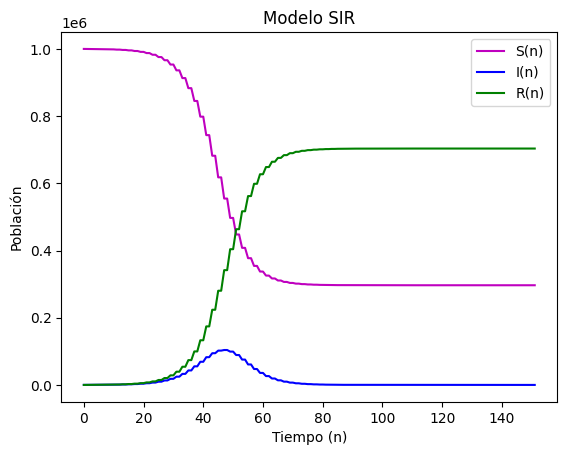

In [5]:
#prueba de la función con los parámetros de arriba
SIR(1000000,127, 0,1, 0.6, 150, True)

### Ejercicio 2:

Utiliza la función que programaste en el ejercicio 2 para determinar el desarrollo de las epidemias con los siguientes parámetros:

|**Caso 1**|**Caso 2**|**Caso 3**|  
|:-----------------|:-----------------|:------------------|
| ```S0``` = 100000|```S0``` = 200000 |```S0``` = 1000000 |
| ```I0``` = 200000|```I0``` = 100000 |```I0``` = 10      |
| ```R0``` = 0     |```R0``` = 0      |```R0``` = 0       |
| ```alfa``` = 0.7 | ```alfa``` = 0.75|```alfa```= 0.75   |
| ```gamma``` = 0.5 | ```gamma``` = 0.5 |```gamma``` = 0.5   |
| ```n``` = 150    | ```n``` = 150    |```n``` = 100      |




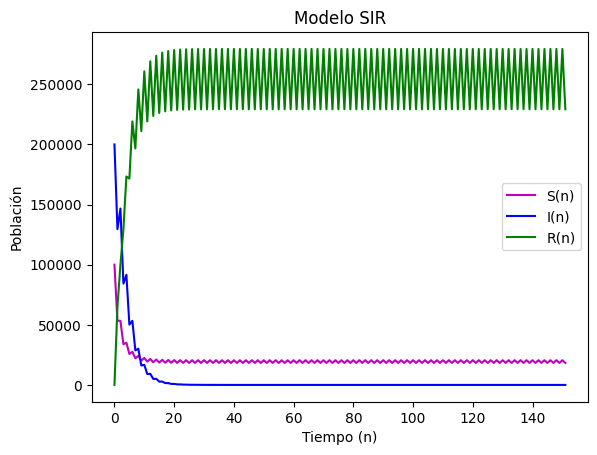

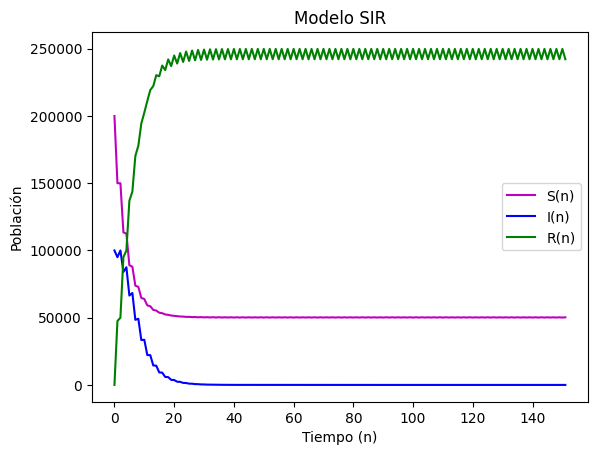

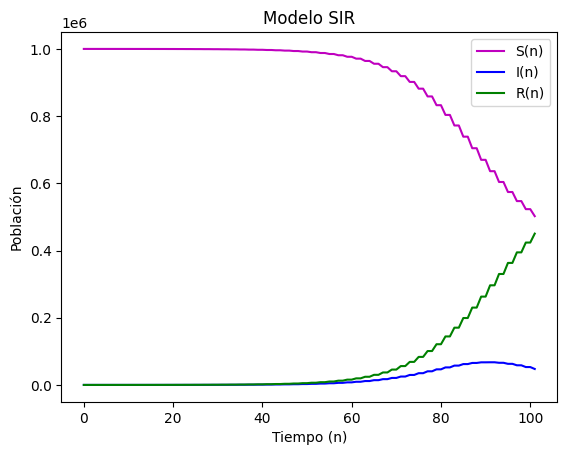

In [6]:
#caso1
SIR(100000,200000, 0,0.7, 0.5, 150, True)
#caso2
SIR(200000,100000, 0,0.75, 0.5, 150, True)
#caso3
SIR(1000000,10, 0,0.75, 0.5, 100, True)

En las gráficas de arriba podemos notar los escenarios posibles del desarrollo del modelo epidemiológico. En las primeras dos gráficas se puede notar que se parecen mucho en su comportamiento a lo largo del tiempo, sin embargo en la última la gráfica se  muestra un comportamiento muy distinto esto se debe al cambio drástico de las condiciones iniciales de la población. 

### Ejercicio 3:

Para los casos del Ejercicio 2 calcula $R_0$ utilizando la definición $(3.0)$ y argumenta como se relaciona este valor con el desarrollo de la epidemia.

\begin{equation}
 \mathcal{R}_0 \equiv \frac{\alpha S_0}{\gamma N} \quad (3)
\end{equation}

Hint: Observa la pendiente de la curva de los infectados en las gráficas anteriores ¿Qué te dice eso sobre los brotes epidémicos? (fijate en el cambio en el número de infectados).

\begin{equation} I_{n+1} - I_{n} = \frac{\alpha S_nI_n}{N} - \gamma I_n
\end{equation}


In [6]:
#caso1 R_0
alpha1 = 0.7
S_0 = 100000
gamma1 = 0.5
I_0 = 200000
N = S_0 + I_0 + 0
r0_1 = (alpha1*S_0)/(gamma1*N)
print(f'R_0 para el primer caso es {r0_1}')

R_0 para el primer caso es 0.4666666666666667


In [9]:
#caso2 R_0
alpha2 = 0.75
S_0 = 200000
gamma2 = 0.5
I_0 = 100000
N = S_0 + I_0 + 0
r0_2 = (alpha2*S_0)/(gamma2*N)
print(f'R_0 para el segundo caso es {r0_2}')

R_0 para el segundo caso es 1.0


In [8]:
#caso3 R_0
alpha3 = 0.75
S_0 = 1000000
gamma3 = 0.5
I_0 = 10
N = S_0 + I_0 + 0
r0_3 = (alpha3*S_0)/(gamma3*N)
print(f'R_0 para el tercer caso es {r0_3}')

R_0 para el tercer caso es 1.4999850001499986


A medida que los días pasan el número de infectados se acerca a 0, y para el caso cuando se empieza con 10 infectados, por algún momento se aprecía un aumento de infectados pero después la gráfica se pega de nuevo al cero. Podemos pensar que ese valor $R_0$ provoca que los infectados tiendan a cero.

Además que los removidos se mueven a la par que los infectados, pues tienen pendientes similares. Los susceptibles poseen pendiente negativa cuando los removidos e infectados tienen pendiente negativa

## Divide y vencerás.

### Ejercico 1
En la famosa *Batalla de Trafalgar* en $1805$, la Armada Naval Británica dirigida por el Almirante Nelson se enfrentó contra la Armada Franco-Española bajo el mando de Napoleón. Inicialmente, los británicos contaban con $27$ barcos, mientras que los franceses contaban con $18$ y los españoles con $15$. Supongamos ahoa que, en cada encuentro, cada lado sufre una pérdida general igual al $10 \%$ del número de barcos del enemigo (los valores decimales pueden pensarse como barcos que no están a su capacidad completa).
- Formule un sistema de ecuaciones en diferencia para modelar el número de barcos $(B_n,F_n)n∈N$ de cada flota después de cada encuentro, empezando de $(B_0,F_0) = (27,33)$. 
- Formule una solución numérica para determinar cuantos enfrentamientos durará la batalla, si consideramos que ésta termina cuando alguno de los dos bandos tiene menos de un barco. ¿Qué bando resulta ganador?

**Planteamiento del Problema**

Vamos a presentar un sistema de ecuaciones en diferencias para estudiar como se van perdiendo los barcos en la Batalla de Trafalgar. Sea $$B_n = \text{Número de Barcos Británicos después del encuentro n}$$
$$F_n = \text{Número de Barcos Franco-Españoles después del encuentro n}$$

La parte del enunciado que nos explica como se van a comportar las perdidas de los barcos es la siguiente: *en cada encuentro, cada lado sufre una pérdida general igual al $10 \%$ del número de barcos del enemigo*

De esta forma, para poder calcular los barcos que tengo despues de un encuentro debo obtener primero la perdida que se calcula con $0.1B_n$ y $0.1F_n$ que esto es el 10% del número de barcos del enemigo así que la perdida para $F_{n+1}$ es $0.1B_n$ y para $B_{n+1}$ es $0.1F_n$. Hecho esto, ya podemos formular nuestro sistema de ecuaciones en diferencias:

$$
\begin{cases}
B_{n + 1}= B_{n} - 0.1F_{n}\\
F_{n + 1}= F_{n} - 0.1B_{n}
\end{cases}
$$
con condiciones inciales $(B_0,F_0) = (27,33)$

**Solución Numérica**

In [21]:
#Implementación creando una función 
def Model_Ejericicio_1(B0, F0):
    B = [] # Número de barcos que quedan en el bando británico
    F = []  # Número de barcos que quedan en el bando Franco-Español
    #Se agregan las condiciones iniciales
    B.append(B0) 
    F.append(F0)
    #Iterador para el ciclo while
    i = 1
    #Comienza el ciclo while 
    while B[-1] >= 1 and F[-1] >= 1:
        B.append(B[i-1] - 0.1*F[i-1])
        F.append(F[i-1] - 0.1*B[i-1])
        i += 1
    return B,F,i

In [22]:
#Usandonuestra función para las condiciones iniciales dadas por el enunciaado
Model_Ejericicio_1(27,33)
#La salida de nuestra función es una tupla
#lo primero que nos regresa es la lista con la cantidad de barcos del banco británico por cada enfrentamiento que hubo en la batalla
#lo segundo que regresa es la lista con la cantidad de barcos del banco Franco-Español por cada enfrentamiento que hubo en la batalla
#Por último te regresa el numero de veces que se ejecuta el ciclo while antes de que algunos de los bandos se quede sin barcos para combatir

([27,
  23.7,
  20.669999999999998,
  17.877,
  15.2907,
  12.88317,
  10.628547,
  8.5027557,
  6.48324987,
  4.548771597,
  2.6791258226999997,
  0.8549677643699995],
 [33,
  30.3,
  27.93,
  25.863,
  24.0753,
  22.546229999999998,
  21.257913,
  20.1950583,
  19.34478273,
  18.696457743,
  18.2415805833,
  17.97366800103],
 12)

De acuerdo a los datos que nos regresa la función **Model_Ejercicio_1**  podemos notar que el bucle While se repitió 12 veces ya que hasta ese momento alguna de las últimas entradas de los arreglos de los dos bandos se quedó con menos de 1 barco. Así que podemos afirmar que hubo 12 enfrentamientos en la batalla 

Con ayuda de nuestra funnción podemos notar que el bando 
**Franco-Español** resulta ganador por que el primero en quedarse sin barcos son los británicos, mientras que el Franco-Español todavía tiene barcos para luchar(Le quedan 17.97 Barcos)



En la realidad, la estrategia del Almirante Nelson fue decisiva para la batalla. La armada franco-española estaba organizada en una línea, formada por tres grupos separados: $A = 3, B = 17$ y $C = 13$. El Almirante Nelson decidió entonces atacar la fuerza $A$ con $13$ barcos británicos, y luego utilizar los barcos sobrevivientes y los $14$ restantes que estaban en reserva para atacar la fuerza $B$, y finalmente usar todos los sobrevivientes para atacar la fuerza $C$.

- Suponiendo que el modelo planteado en el ejercicio 1 sigue siendo válido, construya una solución numérica que tenga en cuenta la estrategia de Nelson y los enfrentamientos en sus tres etapas distintas. ¿La cantidad de encuentros es la misma que antes?¿El resultado de la batalla es similar?.


**Plateamiento:**
Para resolver este inciso usaremos la misma función del inciso anterior, lo que va a cambiar es que vamos a ir cambiando las condiciones iniciales por cada etapa que se lleve a cabo.



In [28]:
'''
En esta primer etapa estamos desarrollando el enfrentamiento del Almirante Nelson hacia la fuerza A con 13 barcos británicos.
Es por eso que para esta parte B0 = 13 y F0 = 3. 
De acuerdo a las salidas de la función podemos notar que los británicos se quedaron con 12.53.
'''
Etapa1=Model_Ejericicio_1(13,3)
Etapa1

([13, 12.7, 12.53], [3, 1.7, 0.42999999999999994], 3)

In [29]:
'''
Para poder desarrollar la estrategia del Almirante en su segunda parte debemos elegir los barcos que nos sobraron en la etapa anterior 
y sumarlos a los restantes esta será nuestra nueva condición inicial, mientras que para los franco-españoles será 17
Condiciones iniciales B0 = restantes de la etapa anterior + 14, F0 = 17
'''
B0_nueva_condicion = Etapa1[0][-1] + 14 #Para acceder a ese valor restante, lo hacemos como cuando accedemos a valores de listas, por sus indeces
Etapa2 = Model_Ejericicio_1(B0_nueva_condicion, 17)
Etapa2

([26.53,
  24.830000000000002,
  23.395300000000002,
  22.208900000000003,
  21.256453000000004,
  20.526095000000005,
  20.008301530000004,
  19.695769010000003,
  19.583319505300004],
 [17,
  14.347,
  11.863999999999999,
  9.524469999999999,
  7.303579999999998,
  5.177934699999998,
  3.1253251999999976,
  1.1244950469999972,
  -0.8450818540000031],
 9)

In [27]:
'''
De la etapa anterior usaremos los barcos que sobraron para la condición inicial de los británicos y 13 para los franco-Españoles

'''
B0_nueva_condicion = Etapa2[0][-1]
Etapa3 = Model_Ejericicio_1(B0_nueva_condicion,13)
Etapa3

([19.583319505300004,
  18.283319505300003,
  17.179152700353004,
  16.257819090459005,
  15.508277007568536,
  14.921313115582656,
  14.489431993672461,
  14.206764002918094,
  14.068990332100451],
 [13,
  11.04166804947,
  9.21333609894,
  7.495420828904699,
  5.869638919858798,
  4.318811219101945,
  2.826679907543679,
  1.3777367081764327,
  -0.04293969211537685],
 9)

**Conclusión**

Para obtener el número de enfrentamientos de la batalla sumamos cada valor de $i$ que te regresa cada etapa de ir aplicando la función donde variamos las condiciones iniciales. En la primer etapa nos regresa la función 3 iteraciones, para la segunda hubo 9, y para la tercer etapa también 9 por lo tanto hubo 21 enfrentamientos con la estrategia del Almirante Nelson. También  con esta estrategia resulta ganador el bando Británico pues aún tiene barcos(14.06) mientras que los franco-Españoles ya no tienen.

### Ejercicio 2
Una estrategia alternativa para vencer a una fuerza superior es aumentar la tecnología empleada por el bando inferior. Suponga ahora que los barcos británicos estaban equipados con armamento superior, lo que produjo que, en cada encuentro, los franco-españoles pierdan una cantidad de barcos igual al $15 \%$ del bando enemigo, mientras que los británicos solo pierden una cantidad de barcos igual al $5 \%$
de la flota enemiga.

- Formule un sistema de ecuaciones en diferencia para modelar el número de barcos de cada flota durante la batalla. Suponga que la armada franco-española empieza con $33$ barcos y los británicos con $27$. 
- Con esta nueva suposición, construya una solución numérica para determinar quien gana si ambas fuerzas se enfrentan directamente. 
- Construya una solución numérica para las tres batallas empleando la estrategia de Nelson aco-plada con el armamento superior de la armada británica.

**Formulación del Problema**


Para formular el sistema de ecuaciones en diferencias debemos notar que la diferencia entre este planteamiento y el anterior es el porcentaje de barcos que pierden los bandos al finalizar un enfrentamiento.

Como la armada franco-Española pierde una cantidad de barcos igual al 15% del bando enemigo, escribiendo la perdida nos queda $0.15B_{n}$. Mientras que los británicos pierden una cantidad de barcos igual al 5% de la flota enemiga, quedando de la siguiente forma $0.05F_{n}$. Reescribiendo el sistema de ecuaciones en diferencias, tenemos que:

$$
\begin{cases}
B_{n + 1}= B_{n} - 0.05F_{n}\\
F_{n + 1}= F_{n} - 0.15B_{n}
\end{cases}
$$

con condiciones inciales $(B_0,F_0) = (27,33)$
**Solución Numérica:**

In [40]:
'''
Nueva implementación tomando en cuenta la fuerza superior con el aumento tecnológico Británico

'''
def Model_Ejercicio_2(B0, F0):
    B = []# Número de barcos que quedan en el bando británico
    F = []# Número de barcos que quedan en el bando Franco-Españoles
    #Agregando las condiciones Inciales
    B.append(B0)
    F.append(F0)
    #Iterador que controla el ciclo while
    i = 1
    #Inicia el ciclo while
    while B[-1] >= 1 and F[-1] >= 1:
        B.append(B[i-1] - 0.05*F[i-1])
        F.append(F[i-1] - 0.15*B[i-1])
        i += 1
    return B,F,i

In [41]:
#Aplicando nuestra función a las condiciones iniciales
# B0 = 27, F0 = 33
Model_Ejercicio_2(27,33)

([27,
  25.35,
  23.9025,
  22.645125,
  21.56701875,
  20.6587509375,
  19.912235765625,
  19.320661225781247,
  18.878428454179684,
  18.58110064177148,
  18.425361042769627],
 [33,
  28.95,
  25.1475,
  21.562125,
  18.165356250000002,
  14.930303437500003,
  11.831490796875002,
  8.844655432031253,
  5.946556248164066,
  3.114791980037114,
  0.32762688377139204],
 11)

Con esta nueva implementación notamos que el bando ganador es el Británico ya que los Franco-Españoles se quedan sin barcos mucho antes. Con una batalla que acumula 11 enfrentamientos

**Estrategia del Almirante Nelson acoplada con el armamento superior Británico**

In [42]:
'''
Esta primer etapa del Almirante Nelson comienza con atacar 13 barcos britanicos a 3 barcos Franco-Españoles, de esta forma las condicones
inicales son B0 = 13 y F0 = 3
Tomemos en cuenta que usamos la función Model_Ejercicio_2 ya que esta ya toma en cuenta el armamento superior Británico
'''
Etapa1 = Model_Ejercicio_2(13,3)
Etapa1

([13, 12.85, 12.7975], [3, 1.05, -0.8774999999999997], 3)

In [43]:
'''
En la segunda etapa de la Estrategia del almirante tomamos como condición inicial B0 = los barcos que sobraron en la etapa anterior + 14
Esto se refleja en el código de arriba creando una variable B0_nueva_condicion donde se almacena esta informmación. Por otro lado F0 es 17 
As+i se estarian atacando a los franco-Españoles como lo dicta el Almirante

'''
B0_nueva_condicion = Etapa1[0][-1] + 14
Etapa2 = Model_Ejercicio_2(B0_nueva_condicion,17)
Etapa2

([26.7975,
  25.947499999999998,
  25.29848125,
  24.844068749999998,
  24.579394859374997,
  24.501051484374997],
 [17,
  12.980375,
  9.08825,
  5.293477812500001,
  1.5668675000000012,
  -2.1200417289062483],
 6)

In [45]:
'''
En la ultima etapa del ataque nuestra condición inicial para los britanicos es los restantes de la etapa anterior y para los franco-Españoles
es 13.
'''
B0_nueva_condicion = Etapa2[0][-1]
Etapa3 = Model_Ejercicio_2(B0_nueva_condicion,13)
Etapa3

([24.501051484374997,
  23.851051484375,
  23.38480937050781,
  23.097450142773436,
  22.98547698531787],
 [13,
  9.32484227734375,
  5.7471845546875,
  2.239463149111329,
  -1.2251543723046865],
 5)

Al haber desarrollado esta estrategia del Almirante tomando en cuenta el poder tecnologico de los británicos, notamos que hubo 14 enfrentamientos en la batalla, este número lo obtuvimos de sumar las $i$ que te regresa la función en cada etapa. Con esto  el ganador de la batalla son los Británicos pues aún tienen barcos para pelear mientras que los Franco-Españoles no.